In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

import seaborn as sns


In [2]:
x_test = pd.read_csv('x_smote_tomek_test.csv', sep=';')
y_test = pd.read_csv('y_smote_tomek_test.csv', sep=';')

In [3]:
y_test.value_counts()

isFraud
0          200061
1          199933
Name: count, dtype: int64

# / Randmon Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

# // SMOTE

In [5]:
x_train = pd.read_csv('x_smote_tomek_train.csv', sep=';')
x_train.head()

,amount,oldbalanceOrg,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.003763,0.358146,0.000134,1.0,0.0,0.0,0.0,0.0
1,0.006450,0.177587,0.001476,1.0,0.0,0.0,0.0,0.0
2,0.025567,0.000000,0.043822,0.0,1.0,0.0,0.0,0.0
3,0.045541,0.000345,0.001556,0.0,1.0,0.0,0.0,0.0
4,0.000586,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0


In [6]:
x_train.shape

(1599477, 8)

In [7]:
y_train = pd.read_csv('y_smote_tomek_train.csv', sep=';')
y_train.value_counts()


isFraud
0          799939
1          799538
Name: count, dtype: int64

In [8]:
y_train = y_train.values.ravel()

In [9]:
modele = RandomForestClassifier()

parametres = {'n_estimators' : [50, 100, 150, 200], 'max_depth' : [10, 20, 30], 'min_samples_split' : [2, 5, 10, 20]}

grid = GridSearchCV(modele, parametres, scoring='f1_weighted', cv=5, verbose=3)

In [9]:
grid = grid.fit(x_train, y_train)
grid.best_params_

In [ ]:
modele = grid.best_estimator_

In [ ]:
modele.fit(x_train, y_train)
y_pred = modele.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.72      0.98      0.83      1582

    accuracy                           1.00    201643
   macro avg       0.86      0.99      0.91    201643
weighted avg       1.00      1.00      1.00    201643



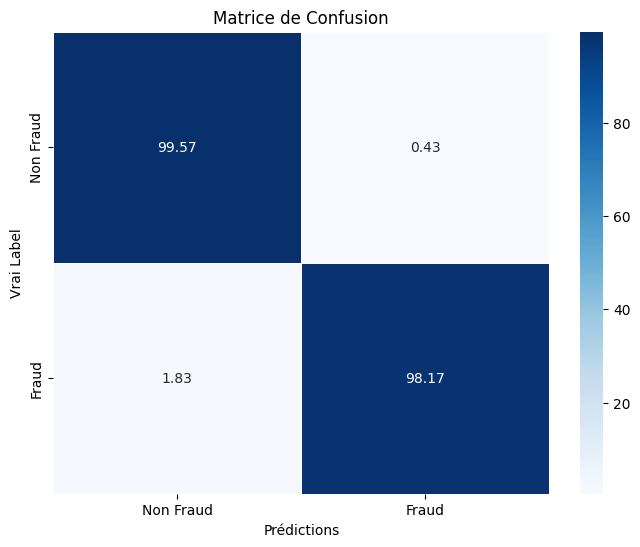

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, xticklabels=["Non Fraud", "Fraud"], yticklabels=["Non Fraud", "Fraud"])
plt.title("Matrice de Confusion")
plt.ylabel("Vrai Label")
plt.xlabel("Prédictions")
plt.show()

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(modele, x_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1,1,10))

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.xlabel('Size of training set')
plt.ylabel('f1_weighted')
plt.title('Learning Curve')
plt.legend()
plt.show()

KeyboardInterrupt: 

# // NEARMISS

In [ ]:
# x_train = pd.read_csv('x_nearmiss_train.csv', sep=';')
# x_train.head()

,amount,oldbalanceOrg,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000002,0.000003,1.020587e-07,0.0,1.0,0.0,0.0,0.0
1,0.000004,0.000000,1.429962e-06,0.0,1.0,0.0,0.0,0.0
2,0.000006,0.000000,2.496552e-07,0.0,1.0,0.0,0.0,0.0
3,0.000008,0.000000,0.000000e+00,0.0,1.0,0.0,0.0,0.0
4,0.000008,0.000000,0.000000e+00,0.0,1.0,0.0,0.0,0.0


In [14]:
# x_train.shape

(13262, 8)

In [ ]:
# y_train = pd.read_csv('y_nearmiss_train.csv', sep=';')
# y_train = y_train.values.ravel()
# y_train.shape

(13262,)

In [16]:
# modele = RandomForestClassifier()
# parametres = {'n_estimators' : [50, 100, 150], 'max_depth' : [10, 20, 30], 'min_samples_split' : [2, 5, 10, 20]}
# grid = GridSearchCV(modele, parametres, scoring='f1_weighted', cv=5)

In [17]:
# grid = grid.fit(x_train, y_train)
# grid.best_params_
# modele = grid.best_estimator_

In [ ]:
# modele.fit(x_train, y_train)
# y_pred = modele.predict(x_test)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61    200061
           1       0.01      0.90      0.02      1582

    accuracy                           0.44    201643
   macro avg       0.51      0.67      0.32    201643
weighted avg       0.99      0.44      0.60    201643



In [19]:
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, xticklabels=["Non Fraud", "Fraud"], yticklabels=["Non Fraud", "Fraud"])
# plt.title("Matrice de Confusion")
# plt.ylabel("Vrai Label")
# plt.xlabel("Prédictions")
# plt.show()

In [20]:
# train_sizes, train_scores, val_scores = learning_curve(modele, x_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1,1,10))

# train_mean = train_scores.mean(axis=1)
# val_mean = val_scores.mean(axis=1)

# plt.plot(train_sizes, train_mean, label='Train')
# plt.plot(train_sizes, val_mean, label='Validation')
# plt.xlabel('Size of training set')
# plt.ylabel('f1_weighted')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

# // SMOTEENN

In [21]:
# x_train = pd.read_csv('x_smoteenn_train.csv', sep=';')
# x_train.head()

,amount,oldbalanceOrg,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.003763,0.358146,0.000134,1.0,0.0,0.0,0.0,0.0
1,0.006450,0.177587,0.001476,1.0,0.0,0.0,0.0,0.0
2,0.025567,0.000000,0.043822,0.0,1.0,0.0,0.0,0.0
3,0.045541,0.000345,0.001556,0.0,1.0,0.0,0.0,0.0
4,0.000586,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0


In [22]:
# x_train.shape

(1589392, 8)

In [23]:
# y_train = pd.read_csv('y_smoteenn_train.csv', sep=';')
# y_train = y_train.values.ravel()
# y_train.shape

(1589392,)

In [24]:
# modele = RandomForestClassifier()
# parametres = {'n_estimators' : [50, 100, 150], 'max_depth' : [10, 20, 30], 'min_samples_split' : [2, 5, 10, 20]}
# grid = GridSearchCV(modele, parametres, scoring='f1_weighted', cv=5)

In [ ]:
# grid = grid.fit(x_train, y_train)
# grid.best_params_
# modele = grid.best_estimator_

In [37]:
# grid.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}

In [ ]:
# modele.fit(x_train, y_train)
# y_pred = modele.predict(x_test)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.65      0.98      0.78      1582

    accuracy                           1.00    201643
   macro avg       0.82      0.99      0.89    201643
weighted avg       1.00      1.00      1.00    201643



In [27]:
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, xticklabels=["Non Fraud", "Fraud"], yticklabels=["Non Fraud", "Fraud"])
# plt.title("Matrice de Confusion")
# plt.ylabel("Vrai Label")
# plt.xlabel("Prédictions")
# plt.show()

In [28]:
# train_sizes, train_scores, val_scores = learning_curve(modele, x_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1,1,10))

# train_mean = train_scores.mean(axis=1)
# val_mean = val_scores.mean(axis=1)

# plt.plot(train_sizes, train_mean, label='Train')
# plt.plot(train_sizes, val_mean, label='Validation')
# plt.xlabel('Size of training set')
# plt.ylabel('f1_weighted')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()